In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [13]:
# SIMPLELINEARBUFFER
# This script demonstrates the basics of creating a linear buffer.
# An input signal is processed by a loop to index the 'current' sample
# and store it in the delay buffer. Each time through the loop the delay
# buffer is shifted to make room for a new sample. The output of the
# process is determined by indexing an element at the end of the delay
# buffer.
#
# Execution of the script is set to 'pause' during the iteration to allow
# a user to view the contents of the delay buffer during each step.
#
# See also DELAYBUFFEREXAMPLE

x = np.append(np.array([1, -1, 2, -2]), np.zeros([6]))
# Buffer should be initialized without any value
# Length of buffer = 5, output is indexed from end of buffer.
# Therefore, a delay of 5 samples is created
buffer = np.zeros([5])

N = np.size(x)
out = np.zeros([N])

for n in range(N):
    # Read the output at the curretn time sample
    # from the end of the delay buffer
    out[n] = buffer[-1]
    np.disp(['For sample ', str(n), ' the output is: ', str(out[n])])

    # Shift each value in the buffer by one element
    # to make room for the current sample to be stored
    # in the first element
    buffer = np.append(x[n], buffer[0:-1])
    # buffer[0, 1:] = buffer[0, 0:-1]
    # buffer[0, 0] = x[0, n]
    np.disp(['For sample ', str(n), ' the buffer is: ', str(buffer)])

# Compare the input and output signals
np.disp(['The original signal was: ', str(x)])
np.disp(['The final output signal is: ', str(out)])

['For sample ', '0', ' the output is: ', '0.0']
['For sample ', '0', ' the buffer is: ', '[1. 0. 0. 0. 0.]']
['For sample ', '1', ' the output is: ', '0.0']
['For sample ', '1', ' the buffer is: ', '[-1.  1.  0.  0.  0.]']
['For sample ', '2', ' the output is: ', '0.0']
['For sample ', '2', ' the buffer is: ', '[ 2. -1.  1.  0.  0.]']
['For sample ', '3', ' the output is: ', '0.0']
['For sample ', '3', ' the buffer is: ', '[-2.  2. -1.  1.  0.]']
['For sample ', '4', ' the output is: ', '0.0']
['For sample ', '4', ' the buffer is: ', '[ 0. -2.  2. -1.  1.]']
['For sample ', '5', ' the output is: ', '1.0']
['For sample ', '5', ' the buffer is: ', '[ 0.  0. -2.  2. -1.]']
['For sample ', '6', ' the output is: ', '-1.0']
['For sample ', '6', ' the buffer is: ', '[ 0.  0.  0. -2.  2.]']
['For sample ', '7', ' the output is: ', '2.0']
['For sample ', '7', ' the buffer is: ', '[ 0.  0.  0.  0. -2.]']
['For sample ', '8', ' the output is: ', '-2.0']
['For sample ', '8', ' the buffer is: ', '[

In [14]:
# DELAYBUFFEREXAMPLES
# This script demonstrates several examples of creating different types (FIR, IIR)
# of systems by using a delay buffer.
#
# See also SIMPLELINEARBUFFER

x = np.append(np.array([1, -1, 2, -2]), np.zeros([6]))
buffer = np.zeros([20]) # longer buffer than delay length

# Number of samples of delay
delay = 5 # does not need to be same length as buffer

N = np.size(x)
out = np.zeros([N])

# Series Delay
for n in range(N):
    out[n] = buffer[delay-1]

    buffer = np.append(x[n], buffer[0:-1])
    # buffer[0, 1:] = buffer[0, 0:-1]
    # buffer[0, 0] = x[0, n]

# Compare input & output signals
np.disp('Series Delay: 5 samples')
np.disp('out(n) = x(n-5)')
np.disp(['The orig. input signal was: ', str(x)])
np.disp(['The final output signal is: ', str(out)])

# Feedforward (FIR) system
out = np.zeros([N])
buffer = np.zeros([20])
delay = 3 # Number of samples of delay

# Parallel delay line
for n in range(N):
    out[n] = x[n] + buffer[delay-1]

    buffer = np.append(x[n], buffer[0:-1])
    # buffer[0, 1:] = buffer[0, 0:-1]
    # buffer[0, 0] = x[0, n]

np.disp('Feed-forward Delay: 3 samples')
np.disp('out(n) = x(n) + x(n-3)')
np.disp(['The orig. input signal was: ', str(x)])
np.disp(['The final output signal is: ', str(out)])

# Feedback (IIR) system
out = np.zeros([N])
buffer = np.zeros([20])

for n in range(N):
    out[n] = x[n] + buffer[delay-1]

    buffer = np.append(out[n], buffer[0:-1])
    # buffer[0, 1:] = buffer[0, 0:-1]
    # buffer[0, 0] = out[0, n]

np.disp('Feedback Delay: 3 samples')
np.disp('out(n) = x(n) + out(n-3)')
np.disp(['The orig. input signal was: ', str(x)])
np.disp(['The final output signal is: ', str(out)])

Series Delay: 5 samples
out(n) = x(n-5)
['The orig. input signal was: ', '[ 1. -1.  2. -2.  0.  0.  0.  0.  0.  0.]']
['The final output signal is: ', '[ 0.  0.  0.  0.  0.  1. -1.  2. -2.  0.]']
Feed-forward Delay: 3 samples
out(n) = x(n) + x(n-3)
['The orig. input signal was: ', '[ 1. -1.  2. -2.  0.  0.  0.  0.  0.  0.]']
['The final output signal is: ', '[ 1. -1.  2. -1. -1.  2. -2.  0.  0.  0.]']
Feedback Delay: 3 samples
out(n) = x(n) + out(n-3)
['The orig. input signal was: ', '[ 1. -1.  2. -2.  0.  0.  0.  0.  0.  0.]']
['The final output signal is: ', '[ 1. -1.  2. -1. -1.  2. -1. -1.  2. -1.]']


In [4]:
# FEEDBACKDELAY
# This function performs feedback delay by processing an individual input sample
# and updating a delay buffer used in a loop to index each sample in a signal.
#
# Additional input variables
#   delay: samples of delay
#   fbGain: feedback gain (linear scale)

def feedbackDelay(x, buffer, delay, fbGain):
    out = x + fbGain * buffer[delay-1]

    # Store the current output in appropriate index
    buffer = np.append(out, buffer[0:-1])

    return out, buffer

In [5]:
# FEEDBACKDELAYEXAMPLE
# This script calls the feedback delay function and passes in the delay buffer.
#
# See also FEEDBACKDELAY

x = np.append(np.array([1, -1, 2, -2]), np.zeros([6])) # Input signal
x = np.vstack(x)
# Longer buffer than delay length to demonstrate delay
# doesn't just have to be the 'end' of the buffer.
buffer = np.zeros([20])

# Number of samples of delay
delay = 5

# Feedback gain coefficient
fbGain = 0.5

# Initialize output vector
N = len(x)
out = np.zeros([N])

# Series delay
for n in range(N):
    # Pass 'buffer' into feedbackDelay function
    out[n], buffer = feedbackDelay(x[n], buffer, delay, fbGain)
    # Return updated 'buffer' for next loop iteration

# Print and compare input and output signals
np.disp('Feedback Delay: 5 samples')
np.disp(['The orig. input signal was: ', str(x)])
np.disp(['The final output signal is: ', str(out)])

Feedback Delay: 5 samples
['The orig. input signal was: ', '[[ 1.]\n [-1.]\n [ 2.]\n [-2.]\n [ 0.]\n [ 0.]\n [ 0.]\n [ 0.]\n [ 0.]\n [ 0.]]']
['The final output signal is: ', '[ 1.  -1.   2.  -2.   0.   0.5 -0.5  1.  -1.   0. ]']


In [7]:
# CIRCULARBUFFER
# This function performs series delay and uses a circular buffer. Rather than
# shifting all the values in the array buffer during each iteration, the index
# changes each time through based on the current sample, 'n'.
#
# Additional input variables
#   delay: samples of delay
#   n: current sample number used for circular buffer

def circularBuffer(x, buffer, delay, n):
    # Determine indexes for circular buffer
    N = len(buffer)
    indexC = np.mod(n-1, N)  # current index in circular buffer
    indexD = np.mod(n-delay-1, N)  # delay index in circular buffer

    out = buffer[indexD]
    # Store current output in appropriate index
    buffer[indexC] = x

    return out, buffer


In [8]:
# CIRCULARBUFFEREXAMPLE
# This script tests a circular buffer function and demonstrates how it works.
#
# See also CIRCULARBUFFER

x = np.append(np.array([1, -1, 2, -2, 3]), np.zeros(5))

buffer = np.zeros(6)

# Number of samples of delay
delay = 4

N = len(x)
out = np.zeros(N)

# Series delay
for n in range(N):
    out[n], buffer = circularBuffer(x[n], buffer, delay, n)

    # Display current status values
    np.disp(['The current sample number is: ', str(n)])
    np.disp(['The current buffer index is: ', str(np.mod(n-1, 6))])
    np.disp(['The current delay index is: ', str(np.mod(n-delay-1, 6))])
    np.disp(['The input is: ', str(x[n])])
    np.disp(['The delay buffer is: [', str(buffer), ']'])
    np.disp(['The output is: ', str(out)])

['The current sample number is: ', '0']
['The current buffer index is: ', '5']
['The current delay index is: ', '1']
['The input is: ', '1']
['The delay buffer is: [', '[0. 0. 0. 0. 0. 1.]', ']']
['The output is: ', '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]']
['The current sample number is: ', '1']
['The current buffer index is: ', '0']
['The current delay index is: ', '2']
['The input is: ', '-1']
['The delay buffer is: [', '[-1.  0.  0.  0.  0.  1.]', ']']
['The output is: ', '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]']
['The current sample number is: ', '2']
['The current buffer index is: ', '1']
['The current delay index is: ', '3']
['The input is: ', '2']
['The delay buffer is: [', '[-1.  2.  0.  0.  0.  1.]', ']']
['The output is: ', '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]']
['The current sample number is: ', '3']
['The current buffer index is: ', '2']
['The current delay index is: ', '4']
['The input is: ', '-2']
['The delay buffer is: [', '[-1.  2. -2.  0.  0.  1.]', ']']
['The output is: ', '[0. 0. 0. 

In [18]:
# LINEARINTERPOLATIONDELAY
# This script demonstrates how to introduce a fractional (non-integer) delay.
# Linear interpolation is used to estimate an amplitude value in between
# adjacent samples.

x = np.append(1, np.zeros(9)) # Horizontal for displaying in command window

fracDelay = 3.2 # Fractional delay length in samples
intDelay = int(np.floor(fracDelay)) # Round down to get the previous (3)
frac = fracDelay - intDelay # Find the fractional amount (0.2)

buffer = np.zeros(5) # len(buffer) >= ceil(fracDelay)
N = len(x)

out = np.zeros(N)

# Series Fractional Delay
for n in range(N):
    out[n] = (1-frac) * buffer[intDelay-1] + frac * buffer[intDelay]

    buffer = np.append(x[n], buffer[0:-1])
    # buffer[1:] = buffer[0:-1]
    # buffer[0] = x[n]

# Compare the input and output signals
np.disp(['The orig. input signal was: ', str(x)])
np.disp(['The final output signal is: ', str(out)])

['The orig. input signal was: ', '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]']
['The final output signal is: ', '[0.  0.  0.  0.8 0.2 0.  0.  0.  0.  0. ]']


['The orig. input signal was: ', '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]']
['The final output signal is: ', '[ 0.     0.    -0.128  0.928  0.232 -0.032  0.     0.     0.     0.   ]']


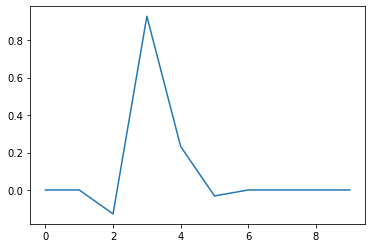

In [3]:
# CUBICINTERPOLATIONDELAY
# This script demonstrates how to introduce a fractional (non-linear) delay.
# Cubic interpolation is used to estimate an amplitude value in-between
# adjacent samples.

x = np.append(1, np.zeros(9))

fracDelay = 3.2 # Fractional delay length in samples
intDelay = int(np.floor(fracDelay)) # Round down to get the previous (3)
frac = fracDelay - intDelay # Find the fractional amount (0.2)

buffer = np.zeros(5) # len(buffer) >= ceil(fracDelay) + 1
N = len(x)

out = np.zeros(N)
# Series fractional delay
for n in range(N):
    # Calculate intermediate variable for cubic interpolation
    a0 = buffer[intDelay+1] - buffer[intDelay] - buffer[intDelay-2] + buffer[intDelay-1]
    a1 = buffer[intDelay-2] - buffer[intDelay-1] - a0
    a2 = buffer[intDelay] - buffer[intDelay-2]
    a3 = buffer[intDelay-1]
    out[n] = a0 * pow(frac, 3) + a1 * pow(frac, 2) + a2 * frac + a3

    buffer = np.append(x[n], buffer[ 0:-1]) # Shift buffer
    # buffer[1:] = buffer[0:-1]
    # buffer[0] = x[n]

# Compare input and output signals
np.disp(['The orig. input signal was: ', str(x)])
np.disp(['The final output signal is: ', str(out)])

plt.plot(out)
# Observe in this plot that the impulse at sample n=1 is delayed by 3.2
# samples. Therefore, the output signal should have an impulse at time 4.2
# samples. With cubic interpolation this impulse contributes to the amplitude
# of the output signal at samples 3, 4, 5, 6. The result of cubic
# interpolation is a closer approximation to the underlying (smooth)
# continuous signal than linear interpolation.
